In [161]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import json_normalize
from flatten_json import flatten
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [19]:
# Find the relevant links in the Premier League website
player_data ="https://cdnapi.bamboo-video.com/api/football/stats?format=json&iid=573881b7181f46ae4c8b4567&filter={%22tournamentId%22:902,%22seasonName%22:%2222/23%22,%22round%22:0}&returnZeros=false&disableDefaultFilter=true&useCache=false&ts=28051780"
player_id ="https://cdnapi.bamboo-video.com/api/football/player?format=json&iid=573881b7181f46ae4c8b4567&returnZeros=true&useCache=false&ts=28051785"
club_id =  "https://cdnapi.bamboo-video.com/api/football/team?format=json&iid=573881b7181f46ae4c8b4567&filter={}&returnZeros=false&disableDefaultFilter=true&useCache=false&ts=28051793"

# A function that convert the json files that were scraped from the website into dataframes 
def js_to_df(URL):
    page = requests.get(URL)
    js =page.json()
    js = js['data']
    ls_keys = list(js.keys())
    df = pd.DataFrame(data=[js[ls_keys[0]].values()])
    for i in range(1,len(ls_keys)):
        df= df.append([js[ls_keys[i]].values()])

    df.columns = js[ls_keys[0]].keys()
    return(df)



In [24]:
df_player_data = js_to_df(player_data)
df_player_id = js_to_df(player_id)
df_club_id = js_to_df(club_id)

In [127]:
# select relevat data
df_player_filter = df_player_id.loc[:,['name','stringBirthDate','position','instatId','teamInstatId']].rename(columns={'instatId':'playerInstatId'})
df_club_filter=df_club_id[df_club_id['leagueId']==902].loc[:,['name','hebrewName','hebrewCoachName','instatId']].rename(columns={'instatId':'teamInstatId','name':"team_name"})
df_player_filter.teamInstatId = df_player_filter.teamInstatId.astype("int")
df_club_filter.teamInstatId = df_club_filter.teamInstatId.astype("int")

In [139]:
# merge the 3 data frames
df_player_team=df_player_filter.merge(df_club_filter, on='teamInstatId')
df_player_data_comp = df_player_data.merge(df_player_team,on='playerInstatId')
df_player_data_comp.stringBirthDate = pd.to_datetime(df_player_data_comp.stringBirthDate)
df_player_data_comp['player_age']=(pd.to_datetime("2023") - df_player_data_comp.stringBirthDate)/np.timedelta64(1, 'Y')

In [172]:
# Results
display(df_player_data_comp.iloc[:,5:].head())

,playerId,playerInstatId,teamId,teamInstatId_x,gameId,gameInstatId,round,seasonName,stage,tournamentId,penalties,Goal,Clearance,OwnGoal,YellowCard,RedCard,PenaltyKick,PenaltyShot_Goal,cleanNet,MissedPenalty,SubIn,SubOut,ShotInsidetheArea,GoalRegular,ShotOutsidetheArea,blockedShot,Assist,Cross,Corner,OffTarget,OnTarget,Blocked,AttemptOnTargetSavedbyGK,CopedAttemptOnTargetSavedbyGK,ThreatDeniedbyGK,ThreatToGK,DirectCrossintotheArea,DirectShot,missedShot,AttackingFK,Offside,Header,AttemptonGoal,CopedAttemptonGoal,CopedGoal,CopedMissedPenalty,appearances,totalDistance,averageDistance,topSpeed,averageSpeed,sprints,averageSprints,totalMinutesPlayed,keyPasses,passes,nonAttackingPasses,attackingPasses,accuratePasses,accurateKeyPasses,CopedOnTarget,CopedThreatDeniedbyGK,CopedPenaltyShot_Goal,CopedPenaltyShot,airChallenge,wonAirChallenge,groundChallenge,wonGroundChallenge,dribble,wonDribble,flankAttacks,foul,steals,wonSteals,ballRecoveryInOppHalf,ballRecoveryInOwnHalf,longBall,accurateLongBall,leftSideAttack,rightSideAttack,centerAttack,leftSideAttackWithShot,rightSideAttackWithShot,centerAttackWithShot,lostBall,ownHalfLostBall,opponentHalfBallRecovery,goalMistake,goodInterceptionGoalie,tackles,tacklesSuccess,ballPossession,CounterAttacks,PositionalAttacks,SetPieceAttacks,ballRecovery,opponentFoul,gamesPlayed,opponentTotalDistance,opponentSprints,opponentShotInsidetheArea,opponentShotOutsidetheArea,opponentHeader,opponentPenaltyShot_Goal,opponentCross,opponentGoal,chanceTotal,accurateAttackingPasses,accurateCrosses,name,stringBirthDate,position,teamInstatId_y,team_name,hebrewName,hebrewCoachName,player_age
0,23016,26011,-1,-1,0,0,0,22/23,totalStage,902,[],0,0,0,2,0,0,0,0,0,0,1,0,0,0,3,1,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,870,3,389,0,386,336,1,0,0,0,0,28,18,50,29,3,2,0,3,0,0,7,50,17,10,0,0,0,0,0,0,22,7,0,0,0,21,11,0.0,0,0,0,57,2,0,0,0,0,0,0,0,0,0,0,335,4,Dino Štiglec,1990-03-10,defenseman,1037,Hapoel Haifa,הפועל חיפה,רוני לוי,32.813815
1,41154,16125,-1,-1,0,0,0,22/23,totalStage,902,[],0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,170,0,0,0,0,0,0,0,0,37,0,18,0,0,0,0,0,0,1780,1,461,0,460,376,0,0,0,2,2,2,2,6,1,1,1,0,0,0,0,0,101,206,142,0,0,0,0,0,0,54,21,0,6,77,4,0,0.0,0,0,0,101,1,0,0,0,0,0,0,0,0,0,0,376,0,Stefan Marinovic,1991-07-10,goalie,130,Hapoel Tel Aviv,"הפועל ת""א",חיים סילבס,31.480455
2,45708,28294,-1,-1,0,0,0,22/23,totalStage,902,[],0,0,0,0,0,0,0,0,0,6,2,0,0,1,0,0,3,6,0,0,0,0,0,0,0,0,0,1,0,3,0,1,0,0,0,8,0,0,0,0,0,0,294,1,99,0,98,78,1,0,0,0,0,6,2,46,15,10,3,0,2,0,0,5,3,1,1,0,0,0,0,0,0,26,3,0,1,0,14,5,0.0,0,0,0,8,4,0,0,0,0,0,0,0,0,0,2,77,1,Sintiyahu Salalik,1991-06-20,mid-fielder,130,Hapoel Tel Aviv,"הפועל ת""א",חיים סילבס,31.535213
3,45720,19516,-1,-1,0,0,0,22/23,totalStage,902,[],0,0,0,5,0,0,0,0,0,6,6,0,0,5,4,1,31,0,0,1,0,0,0,0,0,0,0,4,0,0,0,5,0,0,0,25,0,0,0,0,0,0,1833,15,1063,0,1048,889,6,0,0,0,0,34,19,137,81,19,14,0,7,0,0,19,83,43,31,0,0,0,0,0,0,103,30,0,5,0,52,34,0.0,0,0,0,102,9,0,0,0,0,0,0,0,0,0,0,883,13,Dor Malul,1989-04-30,defenseman,1037,Hapoel Haifa,הפועל חיפה,רוני לוי,33.673518
4,46116,68020,-1,-1,0,0,0,22/23,totalStage,902,[],0,0,0,3,0,0,0,0,0,0,7,1,0,1,13,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,16,0,0,0,0,0,0,1364,1,569,0,568,517,1,0,0,0,0,32,21,80,51,6,5,0,7,0,0,7,76,38,24,0,0,0,0,0,0,27,13,0,6,0,31,21,0.0,0,0,0,83,3,0,0,0,0,0,0,0,0,0,1,516,0,Loai Taha,1989-11-26,defenseman,1037,Hapoel Haifa,הפועל חיפה,רוני לוי,33.098558


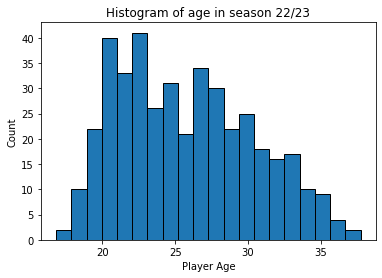

In [174]:
# Example, plot the Histogram of playes age in this season
plt.hist(df_player_data_comp['player_age'],edgecolor="black",bins=20)
plt.title("Histogram of age in season 22/23")
plt.ylabel("Count")
plt.xlabel("Player Age")
plt.show()